# Bibliotekos

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Duomenų importavimas / tvarkymas

In [2]:
data = pd.read_csv('Unicorn_Companies.csv')
data

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [4]:
def convert_to_billions(value):
    if isinstance(value, str):
        if 'B' in value:
            return int(value.replace('$', '').replace('B', ''))
        elif 'M' in value:
            return int(value.replace('$', '').replace('M', '')) / 1000
    return None

data['Valuation'] = data['Valuation'].apply(convert_to_billions)
data['Funding'] = data['Funding'].apply(convert_to_billions)

data.rename(columns={'Valuation': 'Valuation ($B)', 'Funding': 'Funding ($B)'}, inplace=True)

data['Date Joined'] = pd.to_datetime(data['Date Joined'], errors='coerce')

data.head()

,Company,Valuation ($B),Date Joined,Industry,City,Country,Continent,Year Founded,Funding ($B),Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita..."


In [5]:
data['Funding ($B)'] = data['Funding ($B)'].fillna(0)

data['Funding ($B)'] = data['Funding ($B)'].astype(int)

In [6]:
data['Industry'] = data['Industry'].replace('Artificial Intelligence', 'Artificial intelligence')

data['Industry'].unique()


array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery', 'Consumer & retail',
       'Data management & analytics', 'Edtech', 'Health', 'Hardware',
       'Auto & transportation', 'Travel', 'Cybersecurity',
       'Mobile & telecommunications'], dtype=object)

In [7]:
data.head()

,Company,Valuation ($B),Date Joined,Industry,City,Country,Continent,Year Founded,Funding ($B),Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4,"Institutional Venture Partners, Sequoia Capita..."


In [8]:
data['count'] = 1

# Top 5 Countries with the Most Unicorn Companies

In [9]:
top_countries = data.groupby('Country')['count'].count() \
    .sort_values(ascending=False).head(5).reset_index() \
    .sort_values(by='count', ascending=False)
top_countries

,Country,count
0,United States,562
1,China,173
2,India,65
3,United Kingdom,43
4,Germany,26


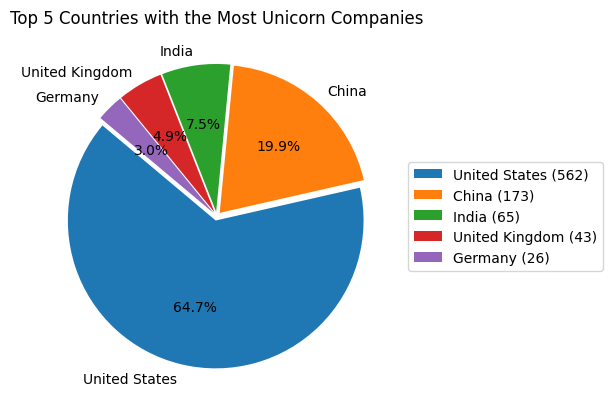

In [10]:
explode = [0.03] * len(top_countries)

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    top_countries['count'],
    labels=top_countries['Country'],
    autopct='%1.1f%%',
    startangle=140,
    explode=explode
)

ax.legend(
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    labels=[f"{country} ({count})" for country, count in zip(top_countries['Country'], top_countries['count'])]
)

ax.set_title('Top 5 Countries with the Most Unicorn Companies')
plt.show()

# Top 5 Cities with the Most Unicorn Companies

In [11]:
top_cities = data.groupby('City')['count'].count() \
    .sort_values(ascending=False).head(5).reset_index() \
    .sort_values(by='count', ascending=False)
top_cities

,City,count
0,San Francisco,152
1,New York,103
2,Beijing,63
3,Shanghai,44
4,London,34


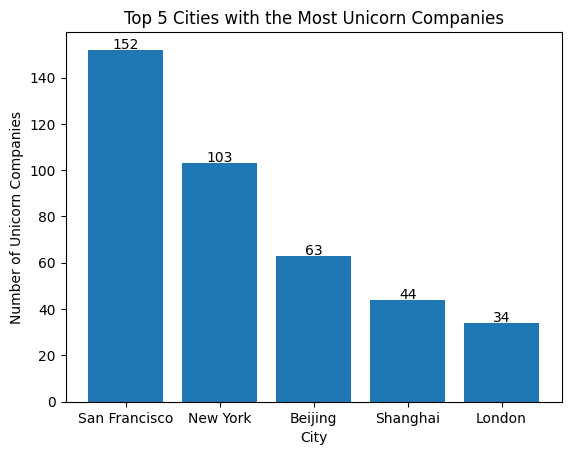

In [12]:
plt.bar(top_cities['City'], top_cities['count'])
plt.title('Top 5 Cities with the Most Unicorn Companies')
plt.xlabel('City')
plt.ylabel('Number of Unicorn Companies')

for i, count in enumerate(top_cities['count']):
    plt.text(i, count + 0.5, str(count), ha='center', fontsize=10)

plt.show()

# Number of Unicorns Joining Each Year

In [13]:
data['Year Joined'] = pd.to_datetime(data['Date Joined']).dt.year

unicorns_per_year = data.groupby('Year Joined')['count'].count() \
    .sort_values(ascending=False).reset_index() \
    .sort_values(by='Year Joined', ascending=True)
unicorns_per_year

,Year Joined,count
12,2007,1
11,2011,2
9,2012,4
10,2013,3
8,2014,13
6,2015,35
7,2016,21
5,2017,44
4,2018,103
3,2019,104


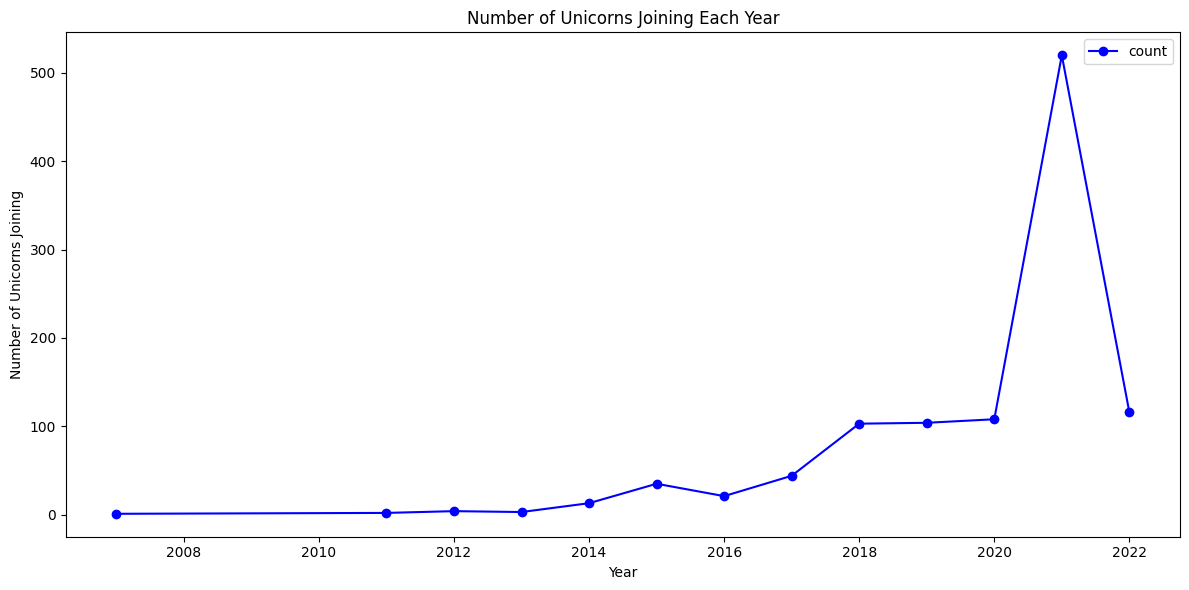

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

unicorns_per_year.plot(x='Year Joined', y='count', kind='line', ax=ax, color='b', marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Number of Unicorns Joining')
ax.set_title('Number of Unicorns Joining Each Year')

plt.tight_layout()
plt.show()

# Top 10 Highest Values Companies

In [15]:
highest_valued_companies = data.sort_values(by='Valuation ($B)', ascending=False).reset_index()

top_10_highest_valued = highest_valued_companies[['Company', 'Industry', 'Valuation ($B)']].head(10)

top_10_highest_valued_sorted = top_10_highest_valued.sort_values(by='Valuation ($B)', ascending=True)

top_10_highest_valued_sorted

,Company,Industry,Valuation ($B)
8,JUUL Labs,Consumer & retail,38
9,Databricks,Data management & analytics,38
7,Instacart,"Supply chain, logistics, & delivery",39
5,Canva,Internet software & services,40
6,Checkout.com,Fintech,40
4,Klarna,Fintech,46
3,Stripe,Fintech,95
1,SpaceX,Other,100
2,SHEIN,E-commerce & direct-to-consumer,100
0,Bytedance,Artificial intelligence,180


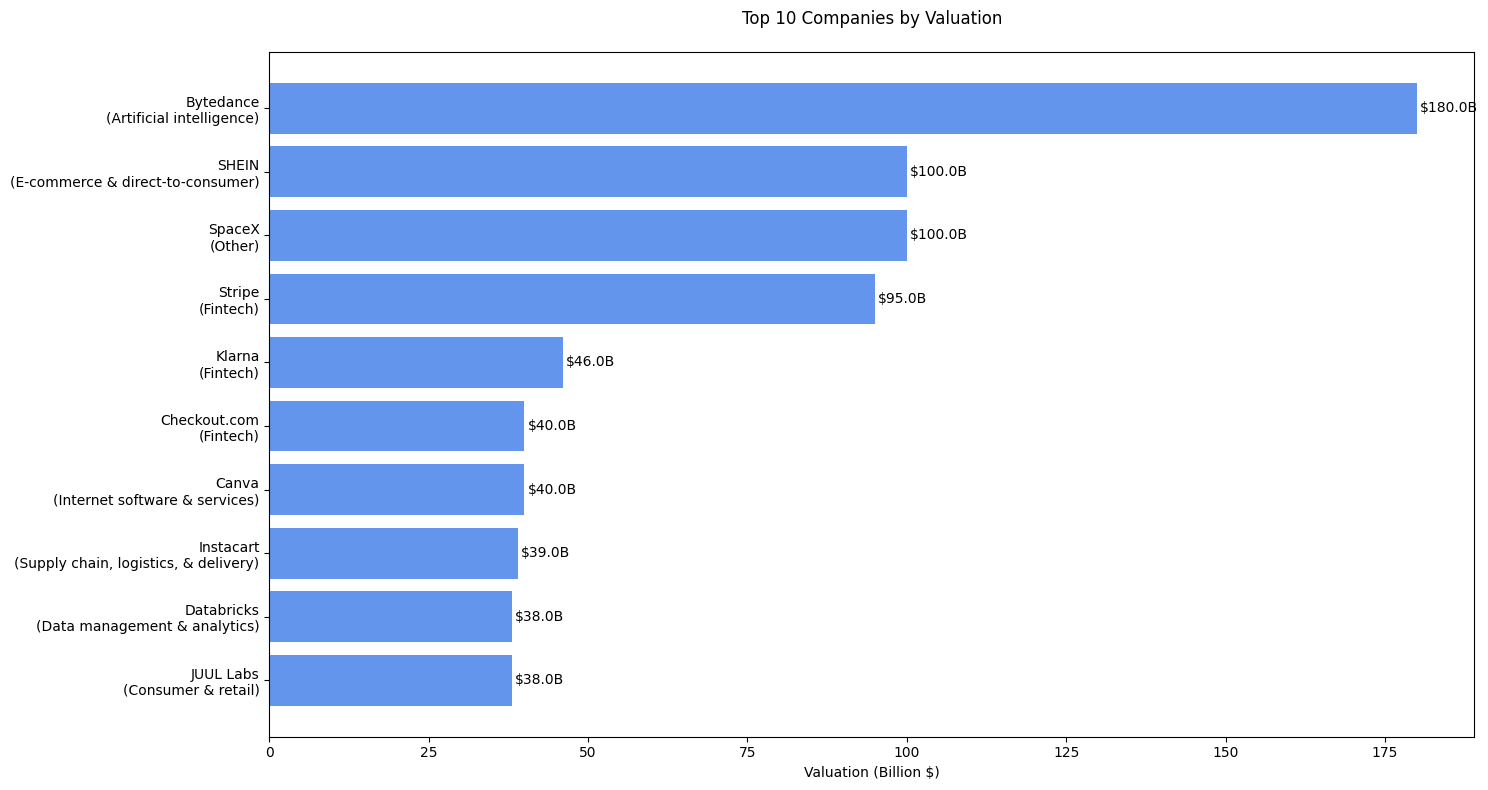

In [16]:
plt.figure(figsize=(15, 8))

bars = plt.barh(range(10),
                top_10_highest_valued_sorted['Valuation ($B)'][:10],
                color='cornflowerblue')

plt.title('Top 10 Companies by Valuation', pad=20)
plt.xlabel('Valuation (Billion $)')

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.5,
             bar.get_y() + bar.get_height()/2,
             f'${width:.1f}B',
             va='center')

labels = [f'{company}\n({industry})' for company, industry in
          zip(top_10_highest_valued_sorted['Company'][:10],
              top_10_highest_valued_sorted['Industry'][:10])]

plt.yticks(range(10), labels)

plt.tight_layout()
plt.show()

# Average Valuation by Country

In [17]:
average_valuation = data['Valuation ($B)'].mean()
print(f"Vidutinė vienaragių kompanijų vertė yra {average_valuation:.2f} mlrd. USD.")

Vidutinė vienaragių kompanijų vertė yra 3.46 mlrd. USD.


In [18]:
valuation_bycountry = data.groupby('Country').agg(
    count=('count', 'count'),
    mean_valuation=('Valuation ($B)', 'mean')
).sort_values(by='mean_valuation', ascending=False).head(10).reset_index()

valuation_bycountry['mean_valuation'] = valuation_bycountry['mean_valuation'].round(2)
valuation_bycountry

,Country,count,mean_valuation
0,Bahamas,1,32.00
1,Sweden,6,10.50
2,Australia,8,7.00
3,Estonia,2,6.50
4,Turkey,3,5.33
5,Lithuania,1,5.00
6,Indonesia,6,4.67
7,United Kingdom,43,4.53
8,China,173,4.02
9,Denmark,2,3.50


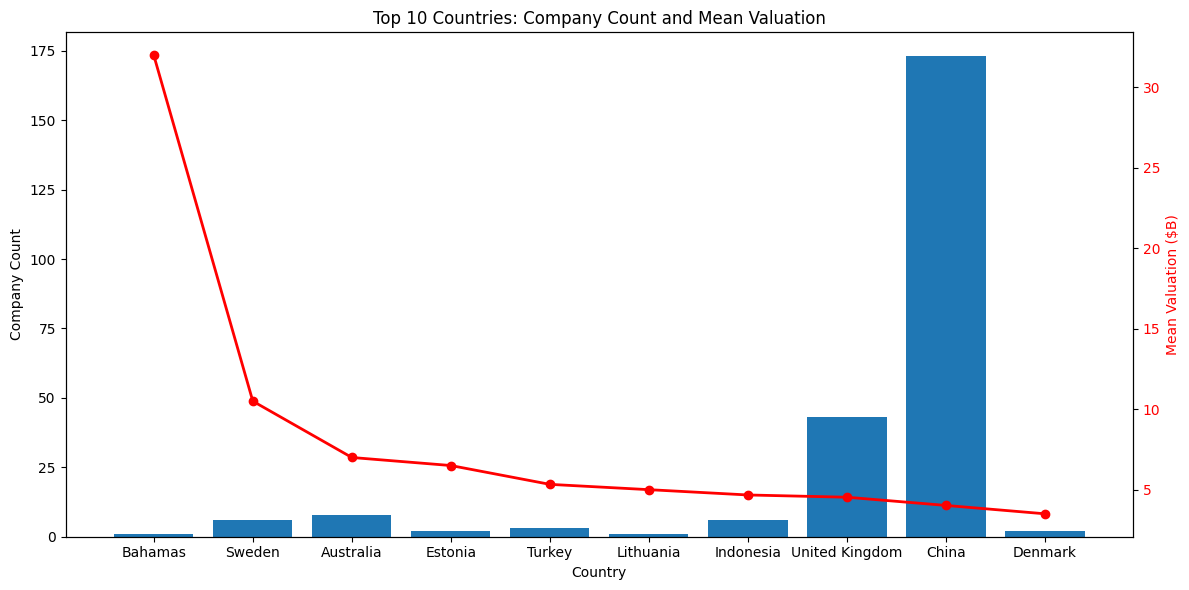

In [19]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(valuation_bycountry['Country'], valuation_bycountry['count'], label='Company Count')

ax2 = ax1.twinx()
ax2.plot(valuation_bycountry['Country'], valuation_bycountry['mean_valuation'], color='r', marker='o', label='Mean Valuation ($B)', linewidth=2)

ax1.set_xlabel('Country')
ax1.set_ylabel('Company Count')
ax2.set_ylabel('Mean Valuation ($B)', color='r')
ax1.tick_params(axis='y')
ax2.tick_params(axis='y', labelcolor='r')

plt.xticks(rotation=45, ha='right')

plt.title('Top 10 Countries: Company Count and Mean Valuation')
plt.tight_layout()
plt.show()

# Average Valuation by Industry

In [20]:
industry_stats = data.groupby('Industry').agg(
    mean_valuation=('Valuation ($B)', 'mean'),
    company_count=('Company', 'size')
).sort_values(by='mean_valuation', ascending=False).head(10).reset_index()

industry_stats


,Industry,mean_valuation,company_count
0,Artificial intelligence,4.488095,84
1,Other,4.344828,58
2,Consumer & retail,4.240000,25
3,Fintech,3.937500,224
4,E-commerce & direct-to-consumer,3.837838,111
5,Edtech,3.571429,28
6,Data management & analytics,3.317073,41
7,Travel,3.285714,14
8,Auto & transportation,3.193548,31
9,"Supply chain, logistics, & delivery",3.105263,57


# Industry Distribution by Valuation Tiers

In [21]:
def categorize_valuation(valuation):
    if valuation == 1:
        return '1$B'
    elif valuation == 2:
        return '2$B'
    else:
        return '3 or more $B'

data['Valuation Category'] = data['Valuation ($B)'].apply(categorize_valuation)

industry_valuation_count = pd.crosstab(data['Industry'], data['Valuation Category'])

industry_valuation_count['Total Companies'] = industry_valuation_count.sum(axis=1)

industry_valuation_count = industry_valuation_count.sort_values('Total Companies', ascending=False).head(10).reset_index()

industry_valuation_count

Valuation Category,Industry,1$B,2$B,3 or more $B,Total Companies
0,Fintech,88,56,80,224
1,Internet software & services,88,46,71,205
2,E-commerce & direct-to-consumer,51,22,38,111
3,Artificial intelligence,40,23,21,84
4,Health,35,14,25,74
5,Other,28,16,14,58
6,"Supply chain, logistics, & delivery",31,11,15,57
7,Cybersecurity,22,10,18,50
8,Data management & analytics,16,11,14,41
9,Mobile & telecommunications,19,7,12,38


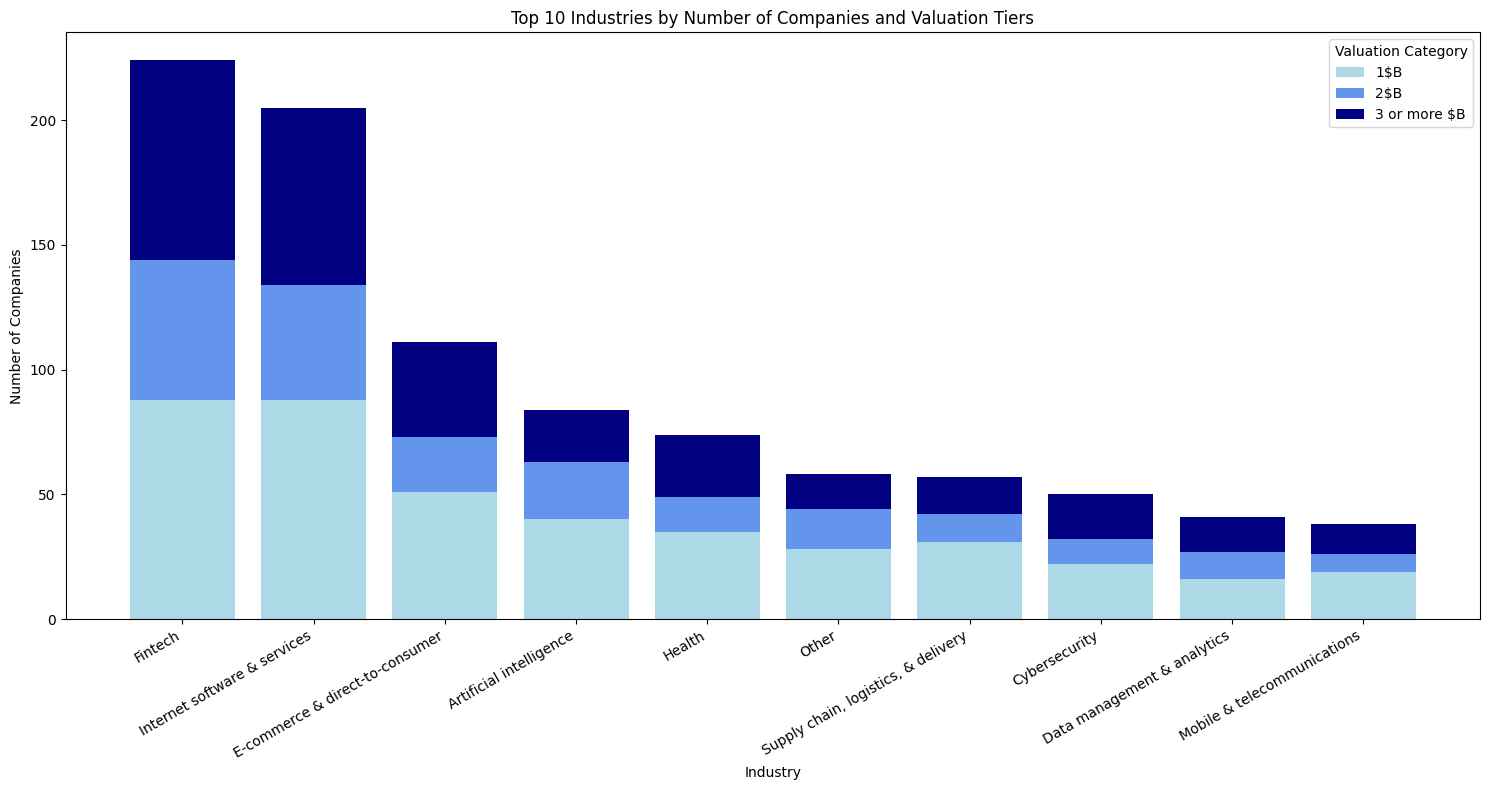

In [22]:
plt.figure(figsize=(15, 8))

plt.bar(industry_valuation_count['Industry'],
        industry_valuation_count['1$B'],
        label='1$B',
        color='lightblue')

plt.bar(industry_valuation_count['Industry'],
        industry_valuation_count['2$B'],
        bottom=industry_valuation_count['1$B'],
        label='2$B',
        color='cornflowerblue')

plt.bar(industry_valuation_count['Industry'],
        industry_valuation_count['3 or more $B'],
        bottom=industry_valuation_count['1$B'] + industry_valuation_count['2$B'],
        label='3 or more $B',
        color='navy')

plt.title('Top 10 Industries by Number of Companies and Valuation Tiers')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.legend(title='Valuation Category')

plt.xticks(rotation=30, ha='right')

plt.tight_layout()

plt.show()

# Funding Statistics

In [23]:
funding_stats = data.groupby('Funding ($B)').agg({
    'Company': lambda x: list(x),
}).reset_index()

funding_stats['Count'] = funding_stats['Company'].str.len()

funding_stats = funding_stats.sort_values('Funding ($B)', ascending=False).head(5)
funding_stats

,Funding ($B),Company,Count
8,14,[JUUL Labs],1
7,8,[Bytedance],1
6,7,"[SpaceX, Epic Games]",2
5,5,"[J&T Express, Xingsheng Selected, Swiggy, Glob...",4
4,4,"[Klarna, Fanatics, BYJU's, Yuanfudao, Argo AI,...",9


In [24]:
no_funding_count = data[data['Funding ($B)'].isna() | (data['Funding ($B)'] == 0)].shape[0]

total_companies = data.shape[0]

no_funding_percentage = (no_funding_count / total_companies) * 100

print(f"Įmonės, negavusios finansavimo sudaro {no_funding_percentage:.2f}%")

Įmonės, negavusios finansavimo sudaro 89.39%


# Correlation of Valuation with Other Numerical Columns

In [25]:
numerical_features = data.select_dtypes(include=['number'])

correlation_matrix = numerical_features.corr()

valuation_correlations = correlation_matrix['Valuation ($B)'].sort_values(ascending=False)
valuation_correlations

,Valuation ($B)
Valuation ($B),1.000000
Funding ($B),0.586838
Year Founded,-0.074395
Year Joined,-0.219981
count,NaN


# Galutinės išvados

Duomenys atvaizduoja įmones pasiekusias 1 ir daugiau mlrd. JAV dolerių vertę iki 2022 m. kovo mėn. Tokių įmonių pateikiama 1074. Duomenis sudaro informacija apie įmonės rinkos vertę (Valuation), investavimo sumą (Funding), iš kokio miesto, šalies ir žemyno yra įmonė, kada kompanija buvo įkurta ir kada tapo vienaragiu, bei informacija apie investuotojus.

Iš duomenų matome, kad JAV turi daugiausiai vienaragių (virš 60% nuo bendro skaičiaus), o pirmaujantys miestai taip pat yra JAV - tai San Fransiskas ir Niujorkas.

2017 m. atsirado pirmasis vienaragis, nuo to laiko skaičius lėtai augo, o 2021 m. pasiekė piką, kuomet net 520 įmonių prisijungė prie sąrašo.

Vidutinė vienaragių kompanijų vertė siekia 3.46 mlrd. USD, tačiau reikia turėti omenyje, kad vidurkis gali būti paveiktas tokių kompanijų, kaip Bytedance, kurių vertė siekia net 180 mlrd. USD. Bahamai, Švedija ir Australija turi didžiausią vidutinę vertę pagal šalį. Pagal sektorių, vidutinė didžiausia vertė sutinkama DI, tačiau vėlgi reikėtų atkreipti dėmesį, kad keletas aukščiausiai vertinamų įmonių, tokių kaip Bytedance, SHEIN ir SpaceX gali iškreipti bendrą vidurkį.

Fintech bei interneto ir programinės įrangos paslaugos yra sektoriai turintys daugiausiai vienaragių.

Tikrinant skaitinių kintamųjų įtaką įmonės vertei, galime matyti, kad finansavimas turi įtakos vertei (koreliacijos koeficientas 0.59). Tačiau verta atkrepti dėmesį, kad įmonės negavusios finansavimo (arba nenurodyta) sudaro beveik 90%, o keletas labai aukštai įvertintų įmonių gavo palyginus ir aukštą finansavimą, tai jau minėtos Bytedance ir SpaceX, bei JUUL Labs.

Įmonės įkurimo metai kompanijos vertei reikšmės neturi (koreliacijos koeficientas -0.07), o prisijungimo metai turi nedidelę neigiamą koreliaciją (-0.21). Tai reiškia, kad įmonės prisijungusios vėliau turi vidutiniškai mažesnę rinkos vertę. Tai galima paaiškinti tuo, kad jos dar yra augimo stadijoje ir vertinamos ne taip aukštai, kaip jau rinkoje įsitvirtinusios įmonės.

Duomenų šaltinis: https://www.mavenanalytics.io/

